

#Importing_Libraries



In [5]:
#python basic libraries
import math,time,random,datetime

#Data Manipulation Libraries
import numpy as np
import pandas as pd

#Data Visualization Libraries
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#Data Preprocessing libraries
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, label_binarize

#Machine learning libraries
from sklearn.model_selection import train_test_split
!pip install catboost
import catboost
from sklearn import model_selection, tree,preprocessing,metrics,linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool,cv


     |████████████████████████████████| 76.6 MB 87 kB/s 


#Data_analysis

In [18]:
ls /root/.kaggle -lah

total 16K
drwxr-xr-x 2 root root 4.0K May 23 06:45 ./
drwx------ 1 root root 4.0K May 23 06:32 ../
-rw------- 1 root root   68 May 23 06:45 kaggle.json


In [20]:
#Loading in the data
!pip install kaggle
!ls .kaggle/ -lah
!mkdir ./.kaggle 
! echo '{"username":"oscarpoudel","key":"431db794c114be1e91ef0790804a88a2"}' > /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c titanic
!unzip titanic.zip
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

total 12K
drwxr-xr-x 2 root root 4.0K May 23 06:38 .
drwxr-xr-x 1 root root 4.0K May 23 06:47 ..
-rw------- 1 root root   68 May 23 06:38 kaggle.json
mkdir: cannot create directory ‘./.kaggle’: File exists
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: gender_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test.csv                
  inflating: train.csv               


In [21]:
#Viewing the data
train.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [22]:
len(train)

891

In [23]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [24]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

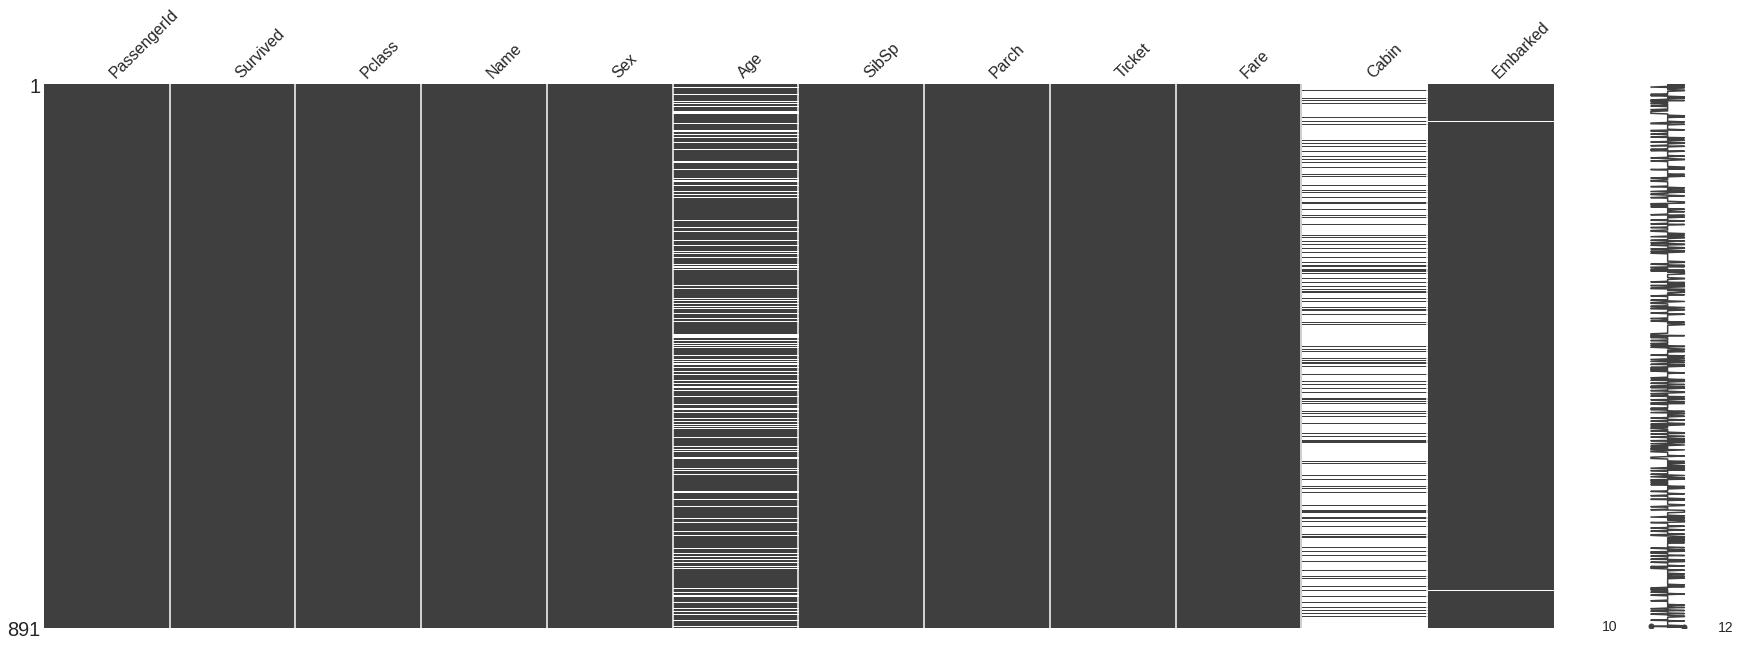

In [25]:
# Find all the missing datas
missingno.matrix(train,figsize=(30,10))

In [36]:
#Function to find missing missing values
def find_missing_values(df):
    missing_vals = df.isnull().sum()
    return missing_vals

missing_values=find_missing_values(train)

In [37]:
#to perform data analysis we create two new dataframe
df_bin = pd.DataFrame() #Discretised continues variables
df_con = pd.DataFrame() #Continous variable


In [38]:
#Check for datatypes
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Exploring each of data individually

0    549
1    342
Name: Survived, dtype: int64


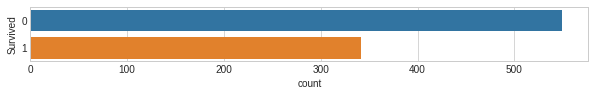

In [39]:
#Target feature : Survived
fig = plt.figure(figsize=(10,1))
sns.countplot(y="Survived",data=train)
print(train.Survived.value_counts())

In [40]:
#Add to subset dataframe
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


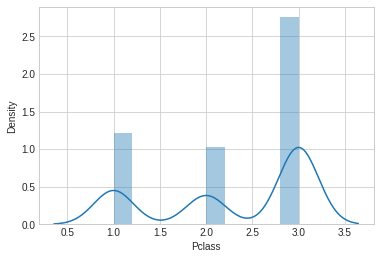

In [41]:
#feature: Pclass (ticket class of the passenger)
sns.distplot(train.Pclass)

In [42]:
#Add pclass to dataframe
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']
df_bin.head()

Survived  Pclass
0         0       3
1         1       1
2         1       3
3         1       1
4         0       3

In [43]:
#Feature name: Name
#Not needed for our data set as it contains 

male      577
female    314
Name: Sex, dtype: int64


0

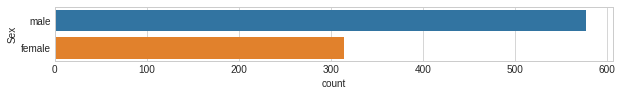

In [44]:
# Feature name:sex
plt.figure(figsize=(10,1))
sns.countplot(y="Sex",data=train)
print(train.Sex.value_counts())
missing_values['Sex']

In [45]:
#Add to dataframe
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex']=='female',1,0)
df_con['Sex'] = train['Sex']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


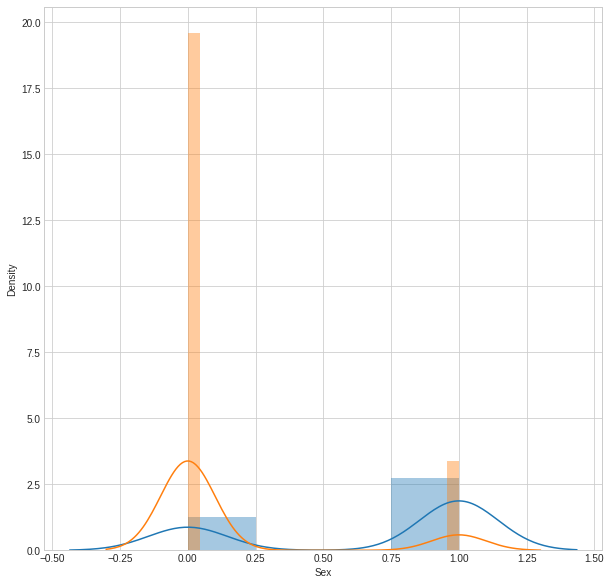

In [46]:
# How does the sex variable compared to survival
fig = plt.figure(figsize = (10,10))
sns.distplot(df_bin.loc[df_bin['Survived']==1 ]['Sex'],kde_kws={'label':"Survived"})
sns.distplot(df_bin.loc[df_bin['Survived']==0 ]['Sex'],kde_kws={'label':"did notSurvived"})

In [47]:
#Feature Age
missing_values['Age']

177

In [48]:
# Fill the missing values in means
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [49]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

In [50]:
# Feature Sibsp
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [51]:
df_bin['SibSp']=train['SibSp']
df_con['SibSp']=train['SibSp']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


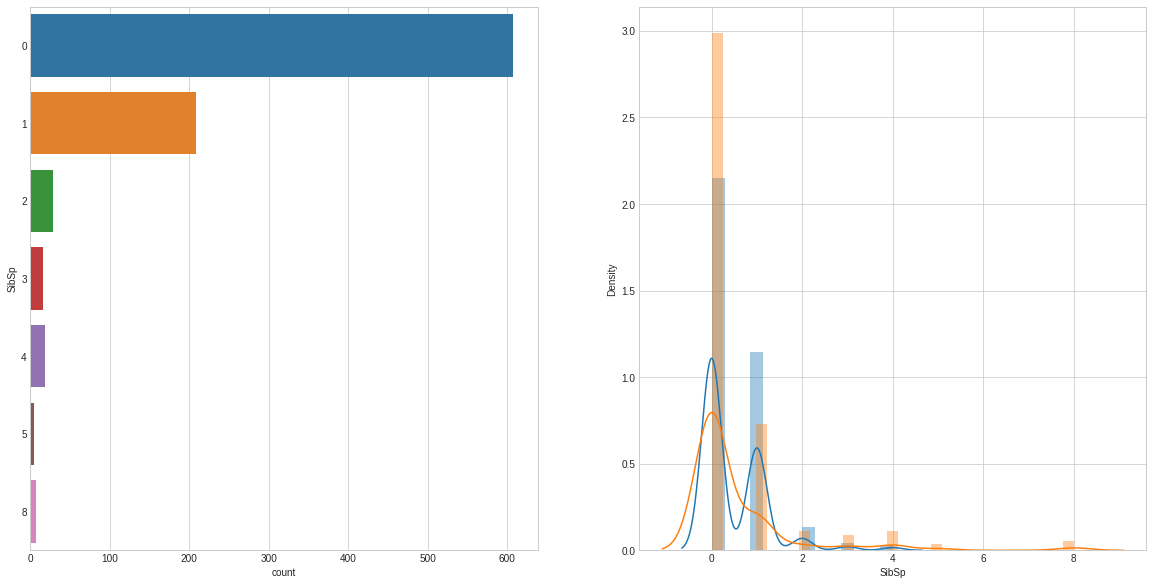

In [52]:
plot_count_dist(train,bin_df=df_bin,label_column='Survived',target_column='SibSp',figsize=(20,10))

In [53]:
df_con.head()

Survived  Pclass     Sex  SibSp
0         0       3    male      1
1         1       1  female      1
2         1       3  female      0
3         1       1  female      1
4         0       3    male      0

In [54]:
#Tickets consists of 700 unique valules
len(train.Ticket.unique())

681

In [55]:
#Feature : Fare
missing_values['Fare']

0

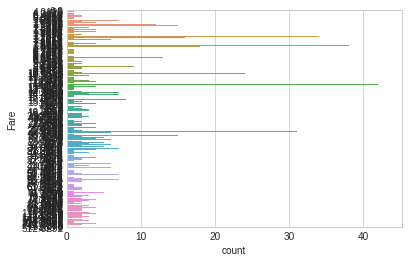

In [56]:
sns.countplot(y='Fare',data=train)

In [57]:
len(train.Fare.unique())

248

In [58]:
df_con['Fare']=train['Fare']
df_bin['Fare']=pd.cut(train['Fare'],5)
df_bin.head()

Survived  Pclass  Sex  SibSp               Fare
0         0       3    0      1  (-0.512, 102.466]
1         1       1    1      1  (-0.512, 102.466]
2         1       3    1      0  (-0.512, 102.466]
3         1       1    1      1  (-0.512, 102.466]
4         0       3    0      0  (-0.512, 102.466]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


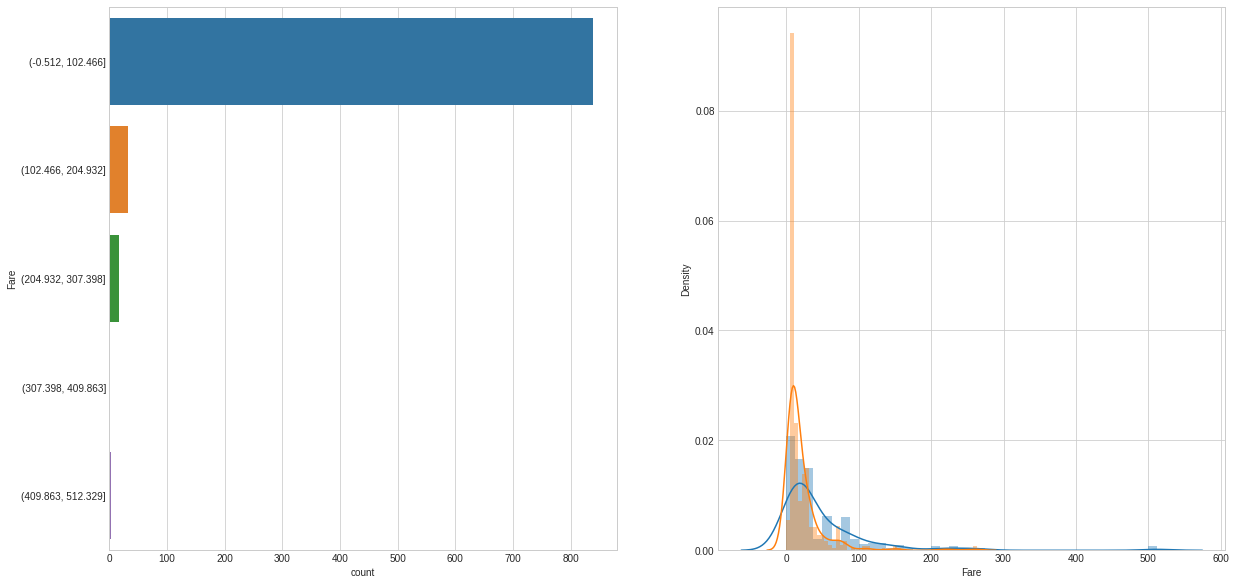

In [59]:
plot_count_dist(data=train,bin_df=df_bin,label_column='Survived',target_column='Fare',figsize=(20,10),use_bin_df=True)

In [60]:
#Cabin has 687 missing values so not adding it
train['Cabin'].isnull().sum()

687

In [61]:
#Feature: Embark
missing_values['Embarked']


2

In [62]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

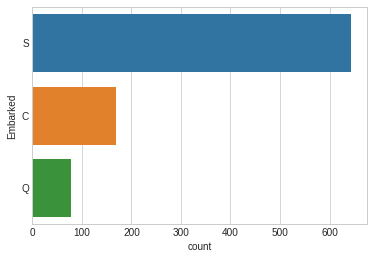

In [63]:
sns.countplot(y='Embarked',data=train)

In [64]:
df_bin['Embarked']  = train['Embarked']
df_con['Embarked']  = train['Embarked']

In [65]:
df_bin  = df_bin.dropna(subset=['Embarked'])
df_con  = df_con.dropna(subset=['Embarked'])

In [66]:
df_bin.Embarked.isnull().sum()

0

In [67]:
#Feature : Parch
df_bin['Parch']  = train['Parch']
df_con['Parch']  = train['Parch']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
df_bin.head()

Survived  Pclass  Sex  SibSp               Fare Embarked  Parch
0         0       3    0      1  (-0.512, 102.466]        S      0
1         1       1    1      1  (-0.512, 102.466]        C      0
2         1       3    1      0  (-0.512, 102.466]        S      0
3         1       1    1      1  (-0.512, 102.466]        S      0
4         0       3    0      0  (-0.512, 102.466]        S      0

In [69]:
df_con.head()

Survived  Pclass     Sex  SibSp     Fare Embarked  Parch
0         0       3    male      1   7.2500        S      0
1         1       1  female      1  71.2833        C      0
2         1       3  female      0   7.9250        S      0
3         1       1  female      1  53.1000        S      0
4         0       3    male      0   8.0500        S      0

#Feature_Encoding

In [73]:
#Once hot encode
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin,columns=one_hot_cols)
df_bin_enc.head()

Survived  Pclass_1  Pclass_2  Pclass_3  Sex_0  Sex_1  SibSp_0  SibSp_1  \
0         0         0         0         1      1      0        0        1   
1         1         1         0         0      0      1        0        1   
2         1         0         0         1      0      1        1        0   
3         1         1         0         0      0      1        0        1   
4         0         0         0         1      1      0        1        0   

   SibSp_2  SibSp_3  ...  Embarked_C  Embarked_Q  Embarked_S  Parch_0  \
0        0        0  ...           0           0           1        1   
1        0        0  ...           1           0           0        1   
2        0        0  ...           0           0           1        1   
3        0        0  ...           0           0           1        1   
4        0        0  ...           0           0           1        1   

   Parch_1  Parch_2  Parch_3  Parch_4  Parch_5  Parch_6  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  

[5 rows x 28 columns]

In [74]:
#label encode all continous variables
df_conc_enc = df_con.apply(LabelEncoder().fit_transform)
df_conc_enc.head()

Survived  Pclass  Sex  SibSp  Fare  Embarked  Parch
0         0       2    1      1    18         2      0
1         1       0    0      1   207         0      0
2         1       2    0      0    41         2      0
3         1       0    0      1   189         2      0
4         0       2    1      0    43         2      0

#Machine learning models

In [75]:
selected_df = df_conc_enc
X_train = selected_df.drop('Survived',axis=1)
y_train = selected_df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [78]:
#Function which runs the requested algorithm and returns the accuracy mectrics
def fit_ml_algo(algo,X_train,y_train,cv):
  model = algo.fit(X_train,y_train)
  acc = round(model.score(X_train,y_train)*100,2)
  train_pred = model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs=-1)
  acc_cv = round(metrics.accuracy_score(y_train,train_pred)*100,2)
  return train_pred,acc,acc_cv

##Logistic Regression##

In [83]:
start_time = time.time()
train_pred_log,acc_log,acc_cv_log=fit_ml_algo(LogisticRegression(),
                                              X_train,y_train,10)
log_time =time.time()-start_time
print("Accuracy: %s",acc_log)
print(f'Accuracy CV :{acc_log}')
print("Running time is : %s",datetime.timedelta(seconds=log_time))

Accuracy: %s 79.42
Accuracy CV :79.42
Running time is : %s 0:00:00.526125


##K-Nearest Neighbour##

In [120]:
start_time = time.time()
train_pred_knn,acc_knn,acc_cv_knn=fit_ml_algo(KNeighborsClassifier(),
                                              X_train,y_train,10)
log_time =time.time()-start_time
print("Accuracy: %s",acc_knn)
print(f'Accuracy CV :{acc_knn}')
print("Running time is : %s",datetime.timedelta(seconds=log_time))

Accuracy: %s 80.54
Accuracy CV :80.54
Running time is : %s 0:00:00.115732


##Gaussian Naive Bayes##

In [121]:
start_time = time.time()
train_pred_gnb,acc_gnb,acc_cv_gnb=fit_ml_algo(GaussianNB(),
                                              X_train,y_train,10)
log_time =time.time()-start_time
print("Accuracy: %s",acc_gnb)
print(f'Accuracy CV :{acc_gnb}')
print("Running time is : %s",datetime.timedelta(seconds=log_time))

Accuracy: %s 76.72
Accuracy CV :76.72
Running time is : %s 0:00:00.116070


##Linear support vector machine##


In [124]:
start_time = time.time()
train_pred_lsv,acc_lsv,acc_cv_lsv=fit_ml_algo(LinearSVC(),
                                              X_train,y_train,10)
log_time =time.time()-start_time
print("Accuracy: %s",acc_lsv)
print(f'Accuracy CV :{acc_lsv}')
print("Running time is : %s",datetime.timedelta(seconds=log_time))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Accuracy: %s 78.52
Accuracy CV :78.52
Running time is : %s 0:00:00.314253


##Stochastic Gradient Descent##

In [126]:
start_time = time.time()
train_pred_sgd,acc_sgd,acc_cv_sgd=fit_ml_algo(SGDClassifier(),
                                              X_train,y_train,10)
log_time =time.time()-start_time
print("Accuracy: %s",acc_sgd)
print(f'Accuracy CV :{acc_sgd}')
print("Running time is : %s",datetime.timedelta(seconds=log_time))

Accuracy: %s 60.4
Accuracy CV :60.4
Running time is : %s 0:00:01.108729


##Decision Tree Classifer##

In [128]:
start_time = time.time()
train_pred_dtc,acc_dtc,acc_cv_dtc=fit_ml_algo(DecisionTreeClassifier(),
                                              X_train,y_train,10)
log_time =time.time()-start_time
print("Accuracy: %s",acc_dtc)
print(f'Accuracy CV :{acc_dtc}')
print("Running time is : %s",datetime.timedelta(seconds=log_time))

Accuracy: %s 92.46
Accuracy CV :92.46
Running time is : %s 0:00:00.086816


##Gradient Boost Trees##

In [90]:
start_time = time.time()
train_pred_gbt,acc_gbt,acc_cv_gbt=fit_ml_algo(GradientBoostingClassifier(),
                                              X_train,y_train,10)
log_time =time.time()-start_time
print("Accuracy: %s",acc_gbt)
print(f'Accuracy CV :{acc_gbt}')
print("Running time is : %s",datetime.timedelta(seconds=log_time))

Accuracy: %s 86.39
Accuracy CV :86.39
Running time is : %s 0:00:01.407574


##CatBoost Algorithm##

In [91]:
#Combination of gradient boost and decision tree classifer
X_train.head()

Pclass  Sex  SibSp  Fare  Embarked  Parch
0       2    1      1    18         2      0
1       0    0      1   207         0      0
2       2    0      0    41         2      0
3       0    0      1   189         2      0
4       2    1      0    43         2      0

In [92]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [96]:
cat_features = np.where(X_train.dtypes!=np.float64())[0]
cat_features

array([0, 1, 2, 3, 4, 5])

In [106]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
from google.colab import output
output.enable_custom_widget_manager()

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [116]:

train_pool = Pool(X_train,y_train,cat_features)
catboost_model = CatBoostClassifier(iterations = 1000,custom_loss=['Accuracy'],
                                    loss_function='Logloss')
catboost_model.fit(train_pool,plot=True)
acc_catboost = round(catboost_model.score(X_train,y_train)*100,2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6870940	total: 6.45ms	remaining: 6.44s
1:	learn: 0.6810110	total: 10ms	remaining: 5.01s
2:	learn: 0.6754556	total: 13.9ms	remaining: 4.62s
3:	learn: 0.6700906	total: 17.4ms	remaining: 4.34s
4:	learn: 0.6645268	total: 20.8ms	remaining: 4.15s
5:	learn: 0.6591901	total: 24.4ms	remaining: 4.04s
6:	learn: 0.6544180	total: 27.3ms	remaining: 3.88s
7:	learn: 0.6491595	total: 30.9ms	remaining: 3.83s
8:	learn: 0.6443421	total: 34.3ms	remaining: 3.78s
9:	learn: 0.6399027	total: 35.8ms	remaining: 3.54s
10:	learn: 0.6350661	total: 37.9ms	remaining: 3.4s
11:	learn: 0.6310479	total: 39.1ms	remaining: 3.22s
12:	learn: 0.6269009	total: 42.3ms	remaining: 3.21s
13:	learn: 0.6226926	total: 45.3ms	remaining: 3.19s
14:	learn: 0.6200466	total: 46.5ms	remaining: 3.05s
15:	learn: 0.6162553	total: 48.1ms	remaining: 2.96s
16:	learn: 0.6120381	total: 50.9ms	remaining: 2.94s
17:	learn: 0.6077436	total: 53.9ms	remaining: 2.94s
18:	learn: 0.6036158	total: 56.9ms	remaining: 2

In [117]:
#Catboost cross validation
start_time = time.time()
cv_params = catboost_model.get_params()
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)
catboost_time = time.time() - start_time
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean'])*100,2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
24:	learn: 0.4823148	test: 0.4545543	best: 0.4545543 (24)	total: 339ms	remaining: 13.2s
25:	learn: 0.4806293	test: 0.4522831	best: 0.4522831 (25)	total: 343ms	remaining: 12.8s
26:	learn: 0.4765426	test: 0.4476691	best: 0.4476691 (26)	total: 350ms	remaining: 12.6s
27:	learn: 0.4734881	test: 0.4450586	best: 0.4450586 (27)	total: 359ms	remaining: 12.5s
28:	learn: 0.4694018	test: 0.4422018	best: 0.4422018 (28)	total: 367ms	remaining: 12.3s
29:	learn: 0.4665403	test: 0.4397534	best: 0.4397534 (29)	total: 376ms	remaining: 12.1s
30:	learn: 0.4635420	test: 0.4364370	best: 0.4364370 (30)	total: 385ms	remaining: 12s
31:	learn: 0.4614946	test: 0.4333010	best: 0.4333010 (31)	total: 389ms	remaining: 11.8s
32:	learn: 0.4594600	test: 0.4301539	best: 0.4301539 (32)	total: 398ms	remaining: 11.7s
33:	learn: 0.4571154	test: 0.4272107	best: 0.4272107 (33)	total: 402ms	remaining: 11.4s
34:	learn: 0.4548404	test: 0.4247126	best: 0.4247126 (34)	total: 408ms	

In [118]:
print('-----Catboost Metrics____')
print("Accuracy:{}".format(acc_catboost))
print("Accuracy cv 10 folds:{}".format(acc_cv_catboost))
print("Running Time:{}".format(datetime.timedelta(seconds=catboost_time)))

-----Catboost Metrics____
Accuracy:88.08
Accuracy cv 10 folds:81.1
Running Time:0:00:53.497845


#Model Results#

In [132]:
models = pd.DataFrame({
    "Model":['Knn','Logistic regression','Naive bayes','stochastic gradient descent',
             'Linear svc','Decision tree','Catboost'],
    "Score":[
             acc_knn,
             acc_log,
             acc_gnb,
             acc_sgd,
             acc_lsv,
             acc_dtc,
             acc_catboost
    ]
})
print('_____Accuracy_scores_____')
models.sort_values(by='Score',ascending=False)

_____Cross_validation_Accuracy_scores_____


Model  Score
5                Decision tree  92.46
6                     Catboost  88.08
1          Logistic regression  86.39
0                          Knn  80.54
4                   Linear svc  78.52
2                  Naive bayes  76.72
3  stochastic gradient descent  60.40

In [133]:
cv_models = pd.DataFrame({
    "Model":['Knn','Logistic regression','Naive bayes','stochastic gradient descent',
             'Linear svc','Decision tree','Catboost'],
    "Score":[
             acc_cv_knn,
             acc_cv_log,
             acc_cv_gnb,
             acc_cv_sgd,
             acc_cv_lsv,
             acc_cv_dtc,
             acc_cv_catboost
    ]
})
print('_____Cross_validation_Accuracy_scores_____')
cv_models.sort_values(by='Score',ascending=False)

_____Cross_validation_Accuracy_scores_____


Model  Score
1          Logistic regression  81.10
6                     Catboost  81.10
5                Decision tree  79.87
2                  Naive bayes  76.38
0                          Knn  74.02
4                   Linear svc  70.08
3  stochastic gradient descent  63.89

#Features Importance


In [135]:
def feature_importance(model,data):
  fea_imp = pd.DataFrame({'imp':model.feature_importances_,'col':data.columns})
  fea_imp = fea_imp.sort_values(['imp','col'],ascending=[True,False]).iloc[-30:]
  _ = fea_imp.plot(kind='barh',x='col',y='imp',figsize=(20,10))
  return fea_imp

imp       col
2   9.938907     SibSp
4  11.923614  Embarked
5  13.560036     Parch
3  16.842637      Fare
0  20.552191    Pclass
1  27.182615       Sex

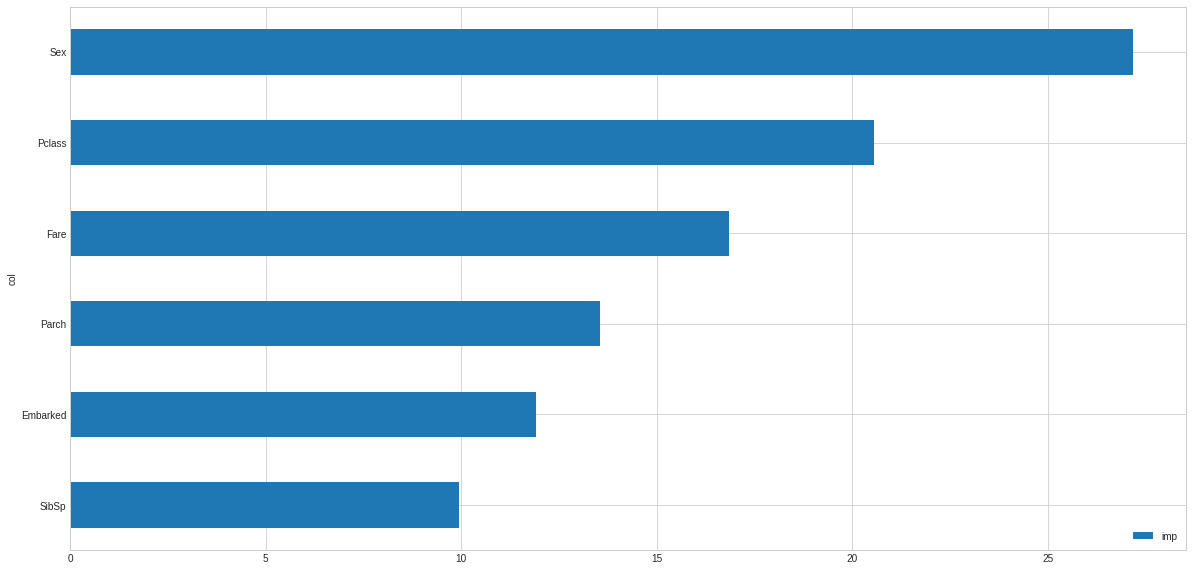

In [136]:
feature_importance(catboost_model,X_train)

#Submission


In [141]:
X_train.head()

Pclass  Sex  SibSp  Fare  Embarked  Parch
0       2    1      1    18         2      0
1       0    0      1   207         0      0
2       2    0      0    41         2      0
3       0    0      1   189         2      0
4       2    1      0    43         2      0

In [139]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [145]:
#Change test dataset to X_train properties as it need to be same where we trained the model
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['Pclass', 'Sex', 'SibSp', 'Fare', 'Embarked', 'Parch'], dtype='object')

In [147]:
predictions = catboost_model.predict(test[wanted_test_columns]
                                     .apply(LabelEncoder().fit_transform))
                                    

In [155]:
predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [165]:
len(test)

418

In [153]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

In [157]:
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [159]:
submission

418

In [169]:
submission.to_csv('./submission.csv',index=False)
from google.colab import files
#files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [170]:
#!kaggle competitions submit -c titanic -f submission.csv -m "first submission"


100% 2.77k/2.77k [00:00<00:00, 4.36kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [171]:
!git init

Initialized empty Git repository in /content/.git/
